In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Reading the data

In [2]:
iris_df = pd.read_csv('Iris.csv')
iris_df.drop(columns=['Id'], axis =1,inplace = True)
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
#Z-score Normalisation
speices_ = iris_df['Species']
iris_df = (iris_df-iris_df.mean(numeric_only=True))/iris_df.std(numeric_only=True)
iris_df['Species']=speices_
iris_df.tail(8)

,PetalLengthCm,PetalWidthCm,SepalLengthCm,SepalWidthCm,Species
142,0.760212,0.918985,-0.052331,-0.816431,Iris-virginica
143,1.213619,1.443121,1.155302,0.336720,Iris-virginica
144,1.100267,1.705189,1.034539,0.567351,Iris-virginica
145,0.816888,1.443121,1.034539,-0.124540,Iris-virginica
146,0.703536,0.918985,0.551486,-1.277692,Iris-virginica
147,0.816888,1.050019,0.793012,-0.124540,Iris-virginica
148,0.930239,1.443121,0.430722,0.797981,Iris-virginica
149,0.760212,0.787951,0.068433,-0.124540,Iris-virginica


In [4]:
iris_df = iris_df.sample(frac =1,random_state =43)

In [5]:
iris_df.reset_index(drop = True,inplace = True)
iris_df

,PetalLengthCm,PetalWidthCm,SepalLengthCm,SepalWidthCm,Species
0,-1.223442,-1.308593,-1.259964,0.106090,Iris-setosa
1,-1.336794,-1.308593,-0.897674,1.028611,Iris-setosa
2,0.590184,0.787951,0.189196,-0.124540,Iris-virginica
3,0.193454,-0.260321,-0.052331,-0.816431,Iris-versicolor
4,1.610349,1.181053,2.121409,-0.124540,Iris-virginica
...,...,...,...,...,...
145,0.476833,0.132781,0.913776,-0.355171,Iris-versicolor
146,-1.280118,-1.046525,-0.897674,1.489872,Iris-setosa
147,-1.336794,-1.308593,-1.018437,0.567351,Iris-setosa
148,-0.089926,0.132781,-0.293857,-0.355171,Iris-versicolor


In [6]:
iris_df.describe()

,PetalLengthCm,PetalWidthCm,SepalLengthCm,SepalWidthCm
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,2.782959e-16,-1.657933e-16,-4.440892e-16,-6.276461e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.563497e+00,-1.439627e+00,-1.863780e+00,-2.430844e+00
25%,-1.223442e+00,-1.177559e+00,-8.976739e-01,-5.858010e-01
50%,3.351431e-01,1.327811e-01,-5.233076e-02,-1.245404e-01
75%,7.602119e-01,7.879511e-01,6.722490e-01,5.673506e-01
max,1.780377e+00,1.705189e+00,2.483699e+00,3.104284e+00


#Implementation of KNN Normal

In [7]:
# function to find the euclidean distance
from math import sqrt
def euc_dist(p1, p2):
    ans =0.0
    size = len(p1);

    for i in range(size-1):
      #print(p1[i]," ")
      ans += (p1[i]-p2[i])**2
    return sqrt(ans)

In [8]:
# creating the KNN-Normal classifier
class KNN_Normal:
  distances = []
  types = []
  def __init__(self,k,train_data,train_type):
    self.k =k;
    self.train_data = train_data
    self.types = train_type
  def get_dist(self, point):
    curr_dist=[]
    for i in self.train_data:
      curr_dist.append(euc_dist(point,i))
    return curr_dist

  def nearest_points(self,point):
    curr_dist = self.get_dist(point)
    indices_of_knn = np.argsort(curr_dist)[:self.k]
    k_nearest_points =[]
    for i in indices_of_knn:
      k_nearest_points.append(self.types[i])
    return k_nearest_points

  def predict(self,point):
    ans = self.nearest_points(point)
    unique_elements, counts = np.unique(ans, return_counts=True)
    return unique_elements[np.argmax(counts)]

In [9]:
# training the data
parameters =np.array(iris_df.columns,dtype='str')
parameters
# splitting the data
train_size = int(0.7*iris_df[parameters[0]].count())
print(train_size)
train_data = iris_df[parameters][:train_size].values
train_type = iris_df['Species'][:train_size].values


test_data = iris_df[parameters][train_size:].values
test_types = iris_df['Species'][train_size:].values

k_values = [1,3,5,10,20]
best_k1=[]
best_acc =0
accuracy =[]
# calculating the accuracies
for k in k_values:
  classifier = KNN_Normal(k,train_data, train_type)
  ans = 0
  for i in range(int(0.3*iris_df[parameters[0]].count())):
    if classifier.predict(test_data[i])==test_types[i]:
      ans+=1
  accuracy.append(ans/45*100)
  if ans/45*100 > best_acc:
    best_acc = ans/45*100

# calculating the best k
for i in range(len(accuracy)):
  if accuracy[i] == best_acc:
    best_k1.append(k_values[i])
best_accuracy_normal =  best_acc


105


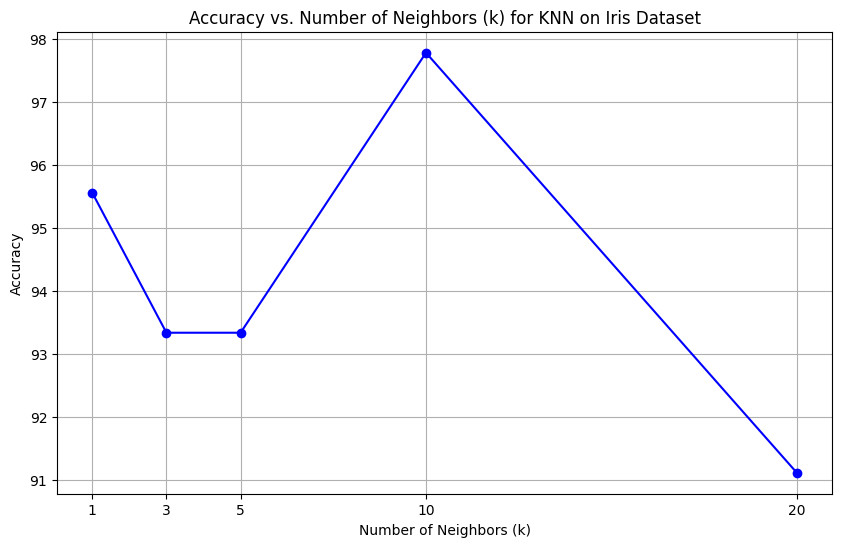

In [10]:

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors (k) for KNN on Iris Dataset')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

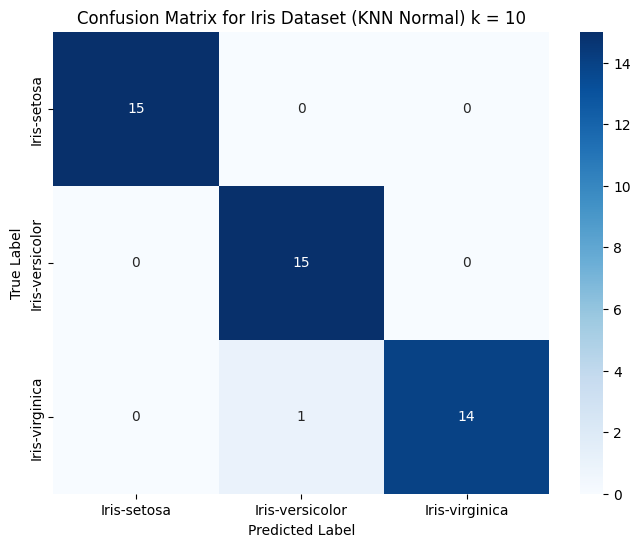

In [11]:
for k in best_k1:
  conf_matrix = np.zeros((3,3),dtype = 'int')
  inp =0
  j=0
  y = KNN_Normal(k,train_data, train_type)
  for i in range(int(0.3*iris_df[parameters[0]].count())):
    inp = 0 if test_types[i] =='Iris-setosa' else (1 if test_types[i] =='Iris-versicolor' else 2)
    output = y.predict(test_data[i])
    j =  0 if output =='Iris-setosa' else (1 if output =='Iris-versicolor' else 2)
    conf_matrix[inp][j] +=1
  conf_matrix
  plt.figure(figsize=(8, 6))
  target_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
  plt.title(f'Confusion Matrix for Iris Dataset (KNN Normal) k = {k}')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

#KNN Weighted

In [12]:
# creating the KNN-Weighted classifier
class KNN_Weighted:
  distances = []
  types = []
  def __init__(self,k,train_data,train_type):
    self.k =k;
    self.train_data = train_data
    self.types = train_type
  def get_dist(self, point):
    curr_dist=[]
    for i in self.train_data:
      curr_dist.append(euc_dist(point,i))
    return curr_dist

  def nearest_points(self,point):
    curr_dist = self.get_dist(point)
    indices_of_knn = np.argsort(curr_dist)[:self.k]
    # print(indices_of_knn)
    k_nearest_points = []
    k_distances = []
    for i in indices_of_knn:
      k_distances.append(curr_dist[i])
      k_nearest_points.append(self.types[i])
    return k_distances,k_nearest_points

  def predict(self,point):
    total_dist = np.zeros(3)
    dist,types = self.nearest_points(point)
    target_names = np.array(['Iris-setosa','Iris-versicolor','Iris-virginica'])
    for i in range(len(types)):
      if dist[i]!=0 :
        total_dist[np.argwhere(target_names ==types[i])] += (1/dist[i])
    return target_names[np.argmax(total_dist)]

In [13]:
#training the data
parameters =np.array(['SepalWidthCm','SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm'])
parameters
train_size = int(0.7*iris_df['Species'].count())
train_data = iris_df[parameters][:train_size].values
train_type = iris_df['Species'][:train_size].values


test_data = iris_df[parameters][train_size:].values
test_types = iris_df['Species'][train_size:].values
k_values = [1,3,5,10,20]
best_k2 =[]
best_acc =0
accuracy =[]
for k in k_values:
  classifier2 = KNN_Weighted(k,train_data, train_type)
  ans = 0
  for i in range(int(0.3*iris_df[parameters[0]].count())):
    if classifier2.predict(test_data[i])==test_types[i]:
      ans+=1
  accuracy.append(ans/45*100)
  #finding the best k
  if ans/45*100 > best_acc:
    best_acc = ans/45*100
for i in range(len(accuracy)):
  if accuracy[i] == best_acc:
    best_k2.append(k_values[i])

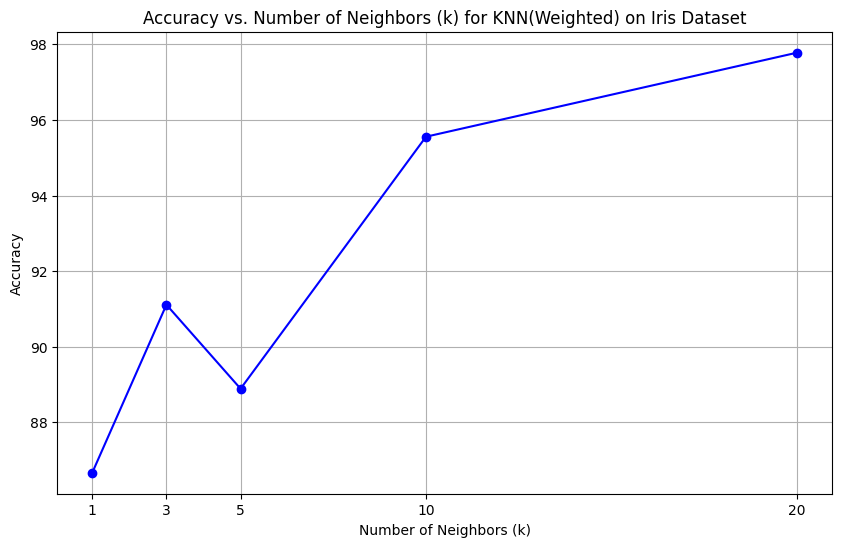

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors (k) for KNN(Weighted) on Iris Dataset')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [15]:
best_k2

[20]

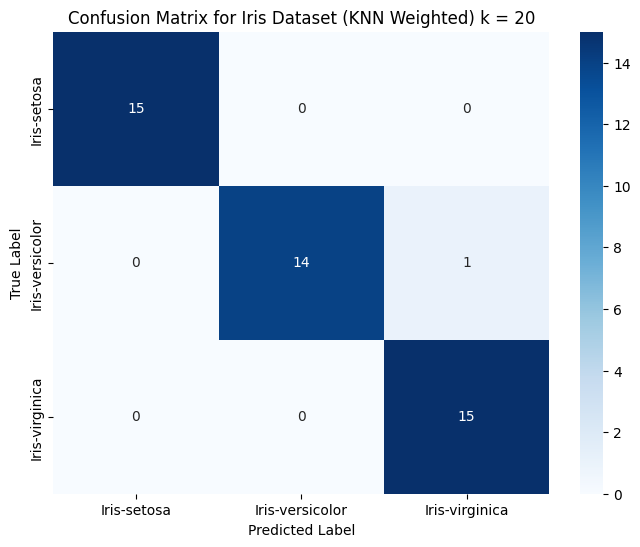

In [16]:
for k in best_k2:
  conf_matrix = np.zeros((3,3),dtype = 'int')
  inp =0
  j=0
  y = KNN_Weighted(k,train_data, train_type)
  for i in range(int(0.3*iris_df[parameters[0]].count())):
    inp = 0 if test_types[i] =='Iris-setosa' else (1 if test_types[i] =='Iris-versicolor' else 2)
    output = y.predict(test_data[i])
    j =  0 if output =='Iris-setosa' else (1 if output =='Iris-versicolor' else 2)
    conf_matrix[inp][j] +=1
  plt.figure(figsize=(8, 6))
  target_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
  plt.title(f'Confusion Matrix for Iris Dataset (KNN Weighted) k = {k}')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

#Adding Noise

In [17]:
train_data_copy = train_data.copy()
train_data[:11]=np.random.normal(loc=train_data.mean(axis=0),scale=train_data.std(axis=0),size =(11,4))


In [18]:
for k in best_k1:
  classifier = KNN_Normal(k,train_data, train_type)
  ans = 0
  for i in range(int(0.3*iris_df[parameters[0]].count())):
    if classifier.predict(test_data[i])==test_types[i]:
      ans+=1
  print(f"After adding noise the accuracy for KNN Normal when k = {k} is {ans/45*100}")


After adding noise the accuracy for KNN Normal when k = 10 is 91.11111111111111


In [19]:
for k in best_k2:
  classifier = KNN_Weighted(k,train_data, train_type)
  ans = 0
  for i in range(int(0.3*iris_df[parameters[0]].count())):
    if classifier.predict(test_data[i])==test_types[i]:
      ans+=1
  print(f"After adding noise the accuracy for KNN Weighted when k = {k} is {ans/45*100}")

After adding noise the accuracy for KNN Weighted when k = 20 is 93.33333333333333


#Curse of Dimensionality

In [20]:
petal_param_data = train_data_copy[:,0:2]
petal_testing = test_data[:,0:2]

sepal_param_data = train_data_copy[:,2:4]
sepal_testing = test_data[:,2:4]

length_param_data = train_data_copy[:,0:4:2]
length_testing = test_data[:,0:4:2]

width_param_data = train_data_copy[:,1:4:2]
width_testing = test_data[:,1:4:2]

train_type = iris_df['Species'][:train_size].values
test_types = iris_df['Species'][train_size:].values
result =[]

In [21]:
result.append(best_accuracy_normal)

In [22]:
for k in best_k1:
  classifier_p = KNN_Normal(k,petal_param_data, train_type)
  ans = 0
  for i in range(45):
    if classifier_p.predict(petal_testing[i])==test_types[i]:
      ans+=1
  result.append(ans/45*100)
print(result)

[97.77777777777777, 42.22222222222222]


In [23]:
for k in best_k1:
  classifier_s = KNN_Normal(k,sepal_param_data, train_type)
  ans = 0
  for i in range(45):
    if classifier_s.predict(sepal_testing[i])==test_types[i]:
      ans+=1
  result.append(ans/45*100)
print(result)

[97.77777777777777, 42.22222222222222, 97.77777777777777]


In [24]:
for k in best_k1:
  classifier_l = KNN_Normal(k,length_param_data, train_type)
  ans = 0
  for i in range(45):
    if classifier_l.predict(length_testing[i])==test_types[i]:
      ans+=1
  result.append(ans/45*100)
print(result)

[97.77777777777777, 42.22222222222222, 97.77777777777777, 42.22222222222222]


In [25]:
for k in best_k1:
  classifier_w = KNN_Normal(k,width_param_data, train_type)
  ans = 0
  for i in range(45):
    if classifier_w.predict(width_testing[i])==test_types[i]:
      ans+=1
  result.append(ans/45*100)
print(result)

[97.77777777777777, 42.22222222222222, 97.77777777777777, 42.22222222222222, 71.11111111111111]


Text(0.5, 1.0, 'Effect of the curse of dimensionality')

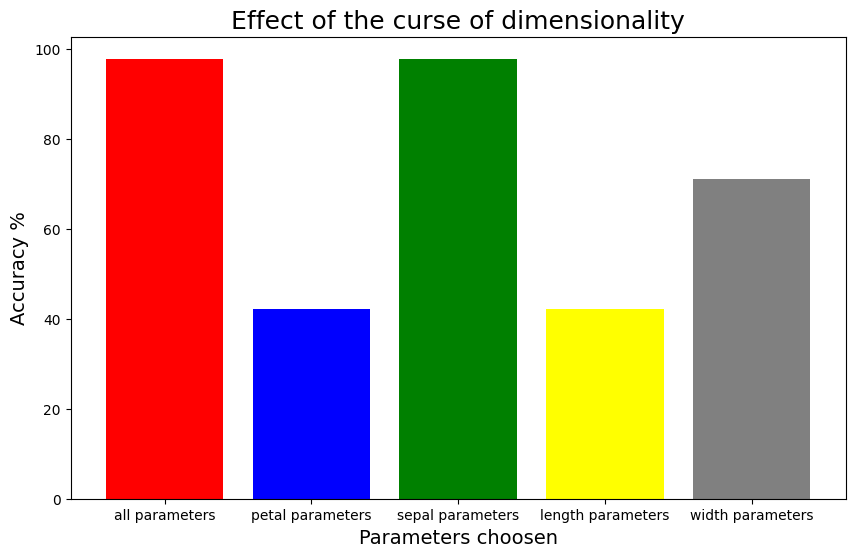

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(['all parameters', 'petal parameters', 'sepal parameters', 'length parameters', 'width parameters'],result,color = ['red','blue', 'green', 'yellow', 'grey'])
plt.xlabel('Parameters choosen',fontsize=14)
plt.ylabel('Accuracy %',fontsize=14)
plt.title('Effect of the curse of dimensionality',fontsize=18)